In [1]:
#import sys
#!conda install --yes -c conda-forge category_encoders

In [2]:
import category_encoders as ce

In [3]:
# -- besure to put the title, name, email and date here in a markdown cell! 


### Load Packages
-------



In [4]:
from IPython.core.display import display, HTML
from IPython.display import clear_output
display(HTML("<style>.container { width:90% }</style>"))
import warnings
warnings.filterwarnings('ignore')
# ------------------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# -- sklearn modules 
from sklearn.model_selection import train_test_split   #- partition train/test split 
from sklearn.tree import DecisionTreeClassifier        #- create a decison tree 
from sklearn.tree import export_text                   #- export tree as text rules 
from sklearn import tree

# -- visualize decision trees and decision surfaces 
# -- you may need to install this package to do this use pip install graphviz or conda install graphviz 

import graphviz 

# -- need this to render charts in notebook -- 
%matplotlib inline


## Tasks 
### Part 1
1. Stage data
2. Clean up column names 
3. Describe data 
4. Explore likely predictors  

### Part 2.
5. Partition into 75/25 split 
6. Train a decision tree model  
7. Evaluate Performance 

### Part 3.  
8. Write up your thoughts. 

# Part 1. 
## 1. Stage 
----- 
import our churn.csv dataset into a pandas dataframe

In [7]:
df = pd.read_csv("./data/churn.csv")
df.head()

State  Account Length  Area Code     Phone Int'l Plan VMail Plan  \
0    KS             128        415  382-4657         no        yes   
1    OH             107        415  371-7191         no        yes   
2    NJ             137        415  358-1921         no         no   
3    OH              84        408  375-9999        yes         no   
4    OK              75        415  330-6626        yes         no   

   VMail Message  Day Mins  Day Calls  Day Charge  ...  Eve Calls  Eve Charge  \
0             25     265.1        110       45.07  ...         99       16.78   
1             26     161.6        123       27.47  ...        103       16.62   
2              0     243.4        114       41.38  ...        110       10.30   
3              0     299.4         71       50.90  ...         88        5.26   
4              0     166.7        113       28.34  ...        122       12.61   

   Night Mins  Night Calls  Night Charge  Intl Mins  Intl Calls  Intl Charge  \
0       244.7           91         11.01       10.0           3         2.70   
1       254.4          103         11.45       13.7           3         3.70   
2       162.6          104          7.32       12.2           5         3.29   
3       196.9           89          8.86        6.6           7         1.78   
4       186.9          121          8.41       10.1           3         2.73   

   CustServ Calls  Churn?  
0               1  False.  
1               1  False.  
2               0  False.  
3               2  False.  
4               3  False.  

[5 rows x 21 columns]

## 2.  Clean up Column Names

*It's just not fun dealing with ill-formed columns*

- remove leading and trailing characters
- replace spaces with underscores _ 
- change case to lower case
- remove various special characters

In [8]:
df.columns = ( df.columns
    .str.strip()
    .str.lower()
    .str.replace(' ', '_')
    .str.replace('-', '_')
    .str.replace('(', '')
    .str.replace(')', '')
    .str.replace('?', '')
    .str.replace('\'', '') # notice the backslash \ this is an escape character
)
print(df.columns)

Index(['state', 'account_length', 'area_code', 'phone', 'intl_plan',
       'vmail_plan', 'vmail_message', 'day_mins', 'day_calls', 'day_charge',
       'eve_mins', 'eve_calls', 'eve_charge', 'night_mins', 'night_calls',
       'night_charge', 'intl_mins', 'intl_calls', 'intl_charge',
       'custserv_calls', 'churn'],
      dtype='object')


## 3. Describe data

### Check Target
-----

Always start by understanding your "target" value 


<div class="alert-success"> 💡  <strong> Comentary </strong>


- Below you can see that 24% are >50K earners, while 76% are <=50K, we also see that we have a good amount of records(48k) 
 
</div>


In [9]:
df['churn'].value_counts()

False.    2850
True.      483
Name: churn, dtype: int64

In [10]:
df['churn'].value_counts(normalize=True)

False.    0.855086
True.     0.144914
Name: churn, dtype: float64

### Describe 
---------
Always take a look at your data to see what you are dealing with 

<div class="alert-success"> 💡  <strong> Comentary </strong>


- below you can see that we have several categorical and numeric features.
 
</div>

In [11]:
df.describe(include='all').T.sort_values('unique')

count unique       top  freq     mean       std   min    25%  \
intl_plan       3333      2        no  3010      NaN       NaN   NaN    NaN   
vmail_plan      3333      2        no  2411      NaN       NaN   NaN    NaN   
churn           3333      2    False.  2850      NaN       NaN   NaN    NaN   
state           3333     51        WV   106      NaN       NaN   NaN    NaN   
phone           3333   3333  406-2678     1      NaN       NaN   NaN    NaN   
account_length  3333    NaN       NaN   NaN  101.065   39.8221     1     74   
area_code       3333    NaN       NaN   NaN  437.182   42.3713   408    408   
vmail_message   3333    NaN       NaN   NaN  8.09901   13.6884     0      0   
day_mins        3333    NaN       NaN   NaN  179.775   54.4674     0  143.7   
day_calls       3333    NaN       NaN   NaN  100.436   20.0691     0     87   
day_charge      3333    NaN       NaN   NaN  30.5623   9.25943     0  24.43   
eve_mins        3333    NaN       NaN   NaN   200.98   50.7138     0  166.6   
eve_calls       3333    NaN       NaN   NaN  100.114   19.9226     0     87   
eve_charge      3333    NaN       NaN   NaN  17.0835   4.31067     0  14.16   
night_mins      3333    NaN       NaN   NaN  200.872   50.5738  23.2    167   
night_calls     3333    NaN       NaN   NaN  100.108   19.5686    33     87   
night_charge    3333    NaN       NaN   NaN  9.03932   2.27587  1.04   7.52   
intl_mins       3333    NaN       NaN   NaN  10.2373   2.79184     0    8.5   
intl_calls      3333    NaN       NaN   NaN  4.47945   2.46121     0      3   
intl_charge     3333    NaN       NaN   NaN  2.76458  0.753773     0    2.3   
custserv_calls  3333    NaN       NaN   NaN  1.56286   1.31549     0      1   

                  50%    75%    max  
intl_plan         NaN    NaN    NaN  
vmail_plan        NaN    NaN    NaN  
churn             NaN    NaN    NaN  
state             NaN    NaN    NaN  
phone             NaN    NaN    NaN  
account_length    101    127    243  
area_code         415    510    510  
vmail_message       0     20     51  
day_mins        179.4  216.4  350.8  
day_calls         101    114    165  
day_charge       30.5  36.79  59.64  
eve_mins        201.4  235.3  363.7  
eve_calls         100    114    170  
eve_charge      17.12     20  30.91  
night_mins      201.2  235.3    395  
night_calls       100    113    175  
night_charge     9.05  10.59  17.77  
intl_mins        10.3   12.1     20  
intl_calls          4      6     20  
intl_charge      2.78   3.27    5.4  
custserv_calls      1      2      9

#### Check out Nulls 
----
Null values can be interesting but you have to deal with them when we get to building models. step 1 is to identify your problem areas. step 2 would be to figure out if there is any predictive power in the nulls, step 3. would be handle them. forturnately we are just going to deal with identifyin if we have any nulls. 

<div class="alert-success"> 💡  <strong> Comentary </strong>


- every column has some number of nulls, even the target. what do we do about them? 
 
</div>

In [12]:
# -- count nulls by column -- 
df.isnull().sum(axis = 0)

state             0
account_length    0
area_code         0
phone             0
intl_plan         0
vmail_plan        0
vmail_message     0
day_mins          0
day_calls         0
day_charge        0
eve_mins          0
eve_calls         0
eve_charge        0
night_mins        0
night_calls       0
night_charge      0
intl_mins         0
intl_calls        0
intl_charge       0
custserv_calls    0
churn             0
dtype: int64

## 4. Explore likely predictors 

----

<div class="alert-success"> 💡  <strong> Comentary </strong>


- I'm not planning on repeating the analysis here, instead i'll just show you that you can treat numeric varaibles as categorical and the pd.crosstab stunt works pretty good regardless of datatype. 
 
</div>


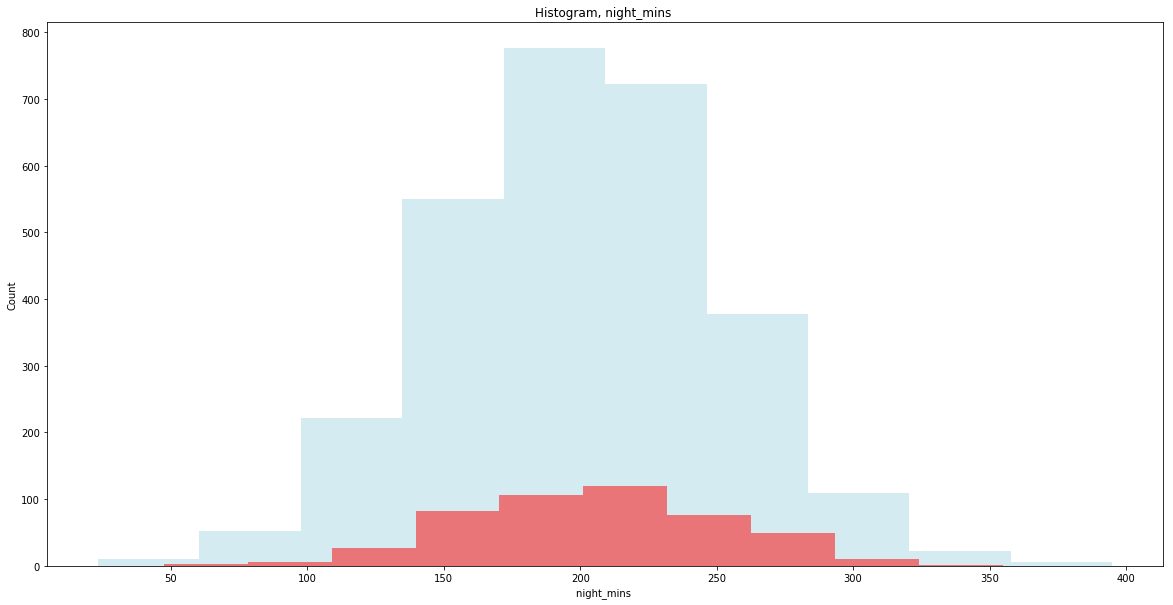

In [13]:
plt.figure(figsize=(20,10))

# -- divide my data into two datasets by target variable 
churnFalse = df.loc[df['churn'] == "False."]
churnTrue = df.loc[df['churn'] == "True."]


# -- simply change the bin size to make the chart look better --
plt.hist(churnFalse['night_mins'], 10, facecolor='lightblue', alpha=0.5)
plt.hist(churnTrue['night_mins'], 10, facecolor='red', alpha=0.5)
plt.title('Histogram, night_mins ')
plt.ylabel('Count')
plt.xlabel('night_mins ')
plt.show()

In [14]:
# -- normalize index converts to row percetages, see anything strange?  
ctab = pd.crosstab(df['state'], df['churn'], normalize="index").reset_index()
ctab

churn state    False.     True.
0        AK  0.942308  0.057692
1        AL  0.900000  0.100000
2        AR  0.800000  0.200000
3        AZ  0.937500  0.062500
4        CA  0.735294  0.264706
5        CO  0.863636  0.136364
6        CT  0.837838  0.162162
7        DC  0.907407  0.092593
8        DE  0.852459  0.147541
9        FL  0.873016  0.126984
10       GA  0.851852  0.148148
11       HI  0.943396  0.056604
12       IA  0.931818  0.068182
13       ID  0.876712  0.123288
14       IL  0.913793  0.086207
15       IN  0.873239  0.126761
16       KS  0.814286  0.185714
17       KY  0.864407  0.135593
18       LA  0.921569  0.078431
19       MA  0.830769  0.169231
20       MD  0.757143  0.242857
21       ME  0.790323  0.209677
22       MI  0.780822  0.219178
23       MN  0.821429  0.178571
24       MO  0.888889  0.111111
25       MS  0.784615  0.215385
26       MT  0.794118  0.205882
27       NC  0.838235  0.161765
28       ND  0.903226  0.096774
29       NE  0.918033  0.081967
30       NH  0.839286  0.160714
31       NJ  0.735294  0.264706
32       NM  0.903226  0.096774
33       NV  0.787879  0.212121
34       NY  0.819277  0.180723
35       OH  0.871795  0.128205
36       OK  0.852459  0.147541
37       OR  0.858974  0.141026
38       PA  0.822222  0.177778
39       RI  0.907692  0.092308
40       SC  0.766667  0.233333
41       SD  0.866667  0.133333
42       TN  0.905660  0.094340
43       TX  0.750000  0.250000
44       UT  0.861111  0.138889
45       VA  0.935065  0.064935
46       VT  0.890411  0.109589
47       WA  0.787879  0.212121
48       WI  0.910256  0.089744
49       WV  0.905660  0.094340
50       WY  0.883117  0.116883

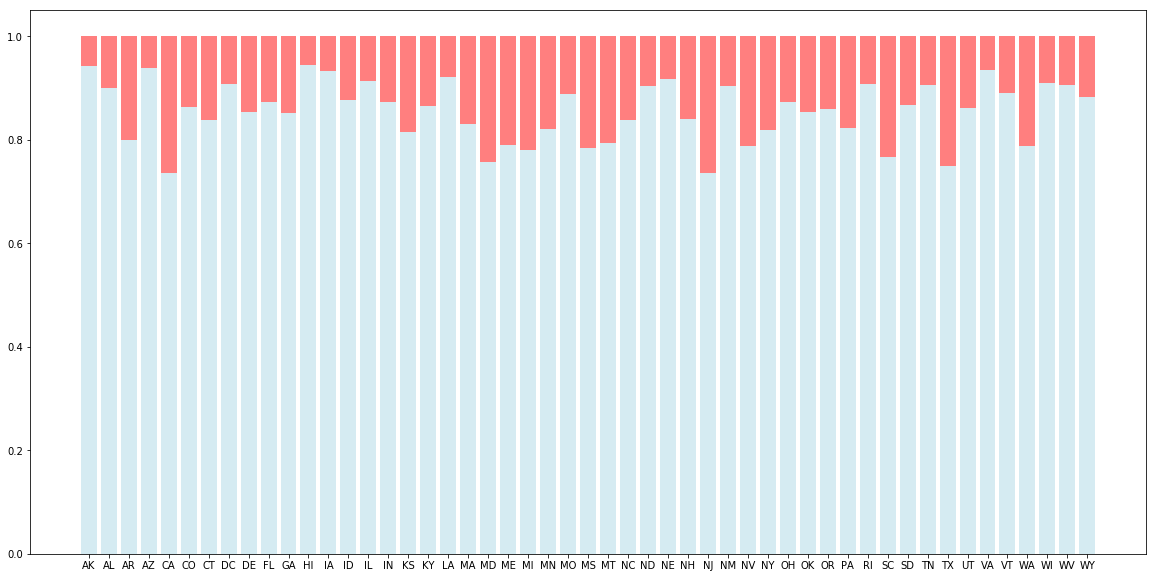

In [15]:
plt.figure(figsize=(20,10))
# -- check out bottom 
plt.bar(ctab['state'].astype('str'), ctab['False.'], facecolor='lightblue', alpha=0.5)
plt.bar(ctab['state'].astype('str'), ctab['True.'], bottom=ctab['False.'], facecolor='red', alpha=0.5)
plt.show()

### Say you have something like day_mins could you do the same thing? 

Sure pandas cut will slice a numeric variable into a number of bins. lets see it in action. 


<div class="alert-success"> 💡  <strong> Comentary </strong>

this is a common thing that happens. the distribution is quite skewed. but you really don't see the power of the cross tab until you visualize it normalized by bin, then there are clear ranges that you could pick out that separates high and low income.  
 
</div>

In [16]:
# -- normalize index converts to row percetages 
df['day_mins_bin'] = pd.cut(df['day_mins'],10).astype(str)
ctab = pd.crosstab(df['day_mins_bin'], df['churn'], ).reset_index()
ctab

churn      day_mins_bin  False.  True.
0       (-0.351, 35.08]      13      1
1      (105.24, 140.32]     412     67
2       (140.32, 175.4]     711     87
3       (175.4, 210.48]     767     45
4      (210.48, 245.56]     510     84
5      (245.56, 280.64]     164    100
6      (280.64, 315.72]      35     49
7       (315.72, 350.8]       0     20
8        (35.08, 70.16]      58      9
9       (70.16, 105.24]     180     21

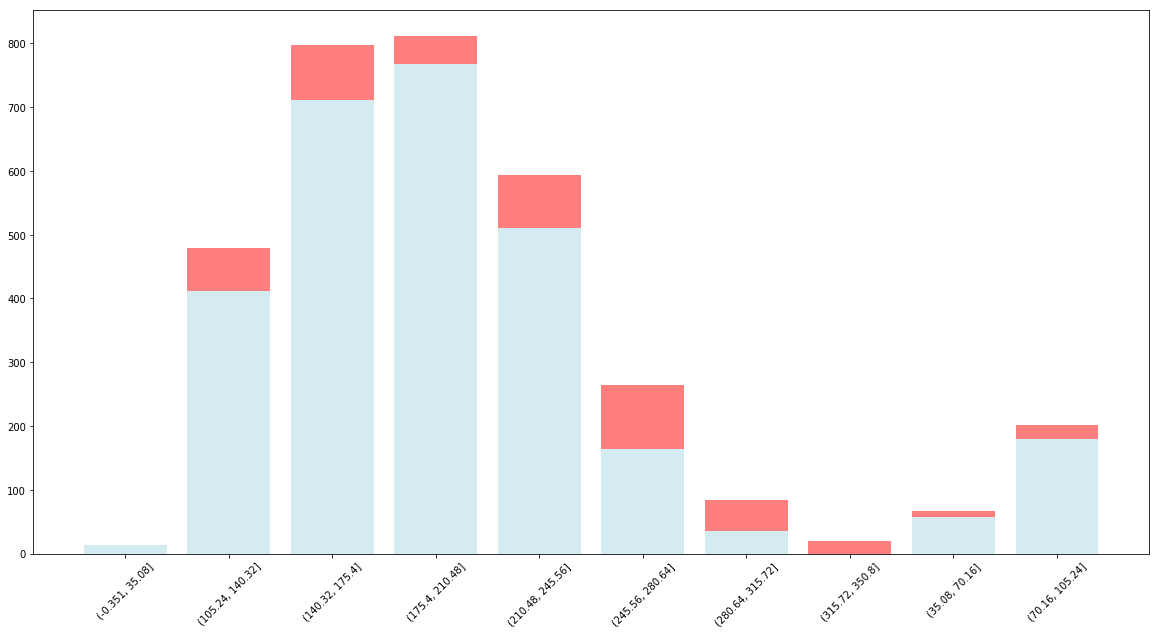

In [17]:
plt.figure(figsize=(20,10))
# -- check out bottom 
plt.bar(ctab['day_mins_bin'].astype(str), ctab['False.'], facecolor='lightblue', alpha=0.5)
plt.bar(ctab['day_mins_bin'].astype(str), ctab['True.'], bottom=ctab['False.'], facecolor='red', alpha=0.5)
plt.xticks(rotation=45)
plt.show()

In [18]:
ctab = pd.crosstab(df['day_mins_bin'], df['churn'], normalize="index").reset_index()
ctab

churn      day_mins_bin    False.     True.
0       (-0.351, 35.08]  0.928571  0.071429
1      (105.24, 140.32]  0.860125  0.139875
2       (140.32, 175.4]  0.890977  0.109023
3       (175.4, 210.48]  0.944581  0.055419
4      (210.48, 245.56]  0.858586  0.141414
5      (245.56, 280.64]  0.621212  0.378788
6      (280.64, 315.72]  0.416667  0.583333
7       (315.72, 350.8]  0.000000  1.000000
8        (35.08, 70.16]  0.865672  0.134328
9       (70.16, 105.24]  0.895522  0.104478

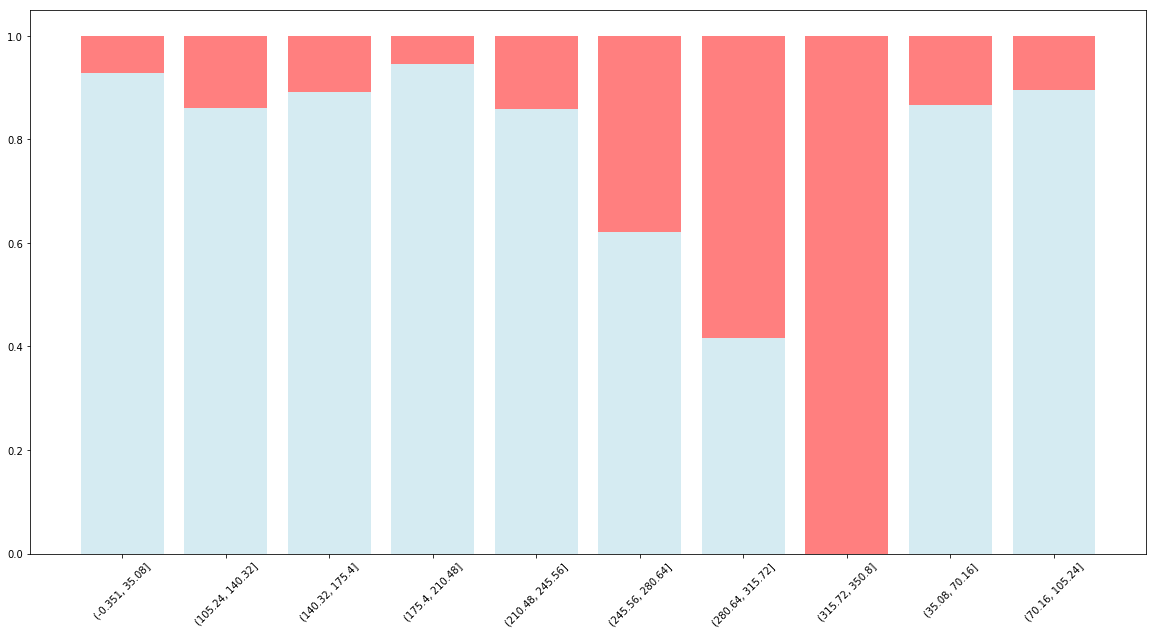

In [19]:
plt.figure(figsize=(20,10))
# -- check out bottom 
plt.bar(ctab['day_mins_bin'].astype(str), ctab['False.'], facecolor='lightblue', alpha=0.5)
plt.bar(ctab['day_mins_bin'].astype(str), ctab['True.'], bottom=ctab['False.'], facecolor='red', alpha=0.5)
plt.xticks(rotation=45)
plt.show()

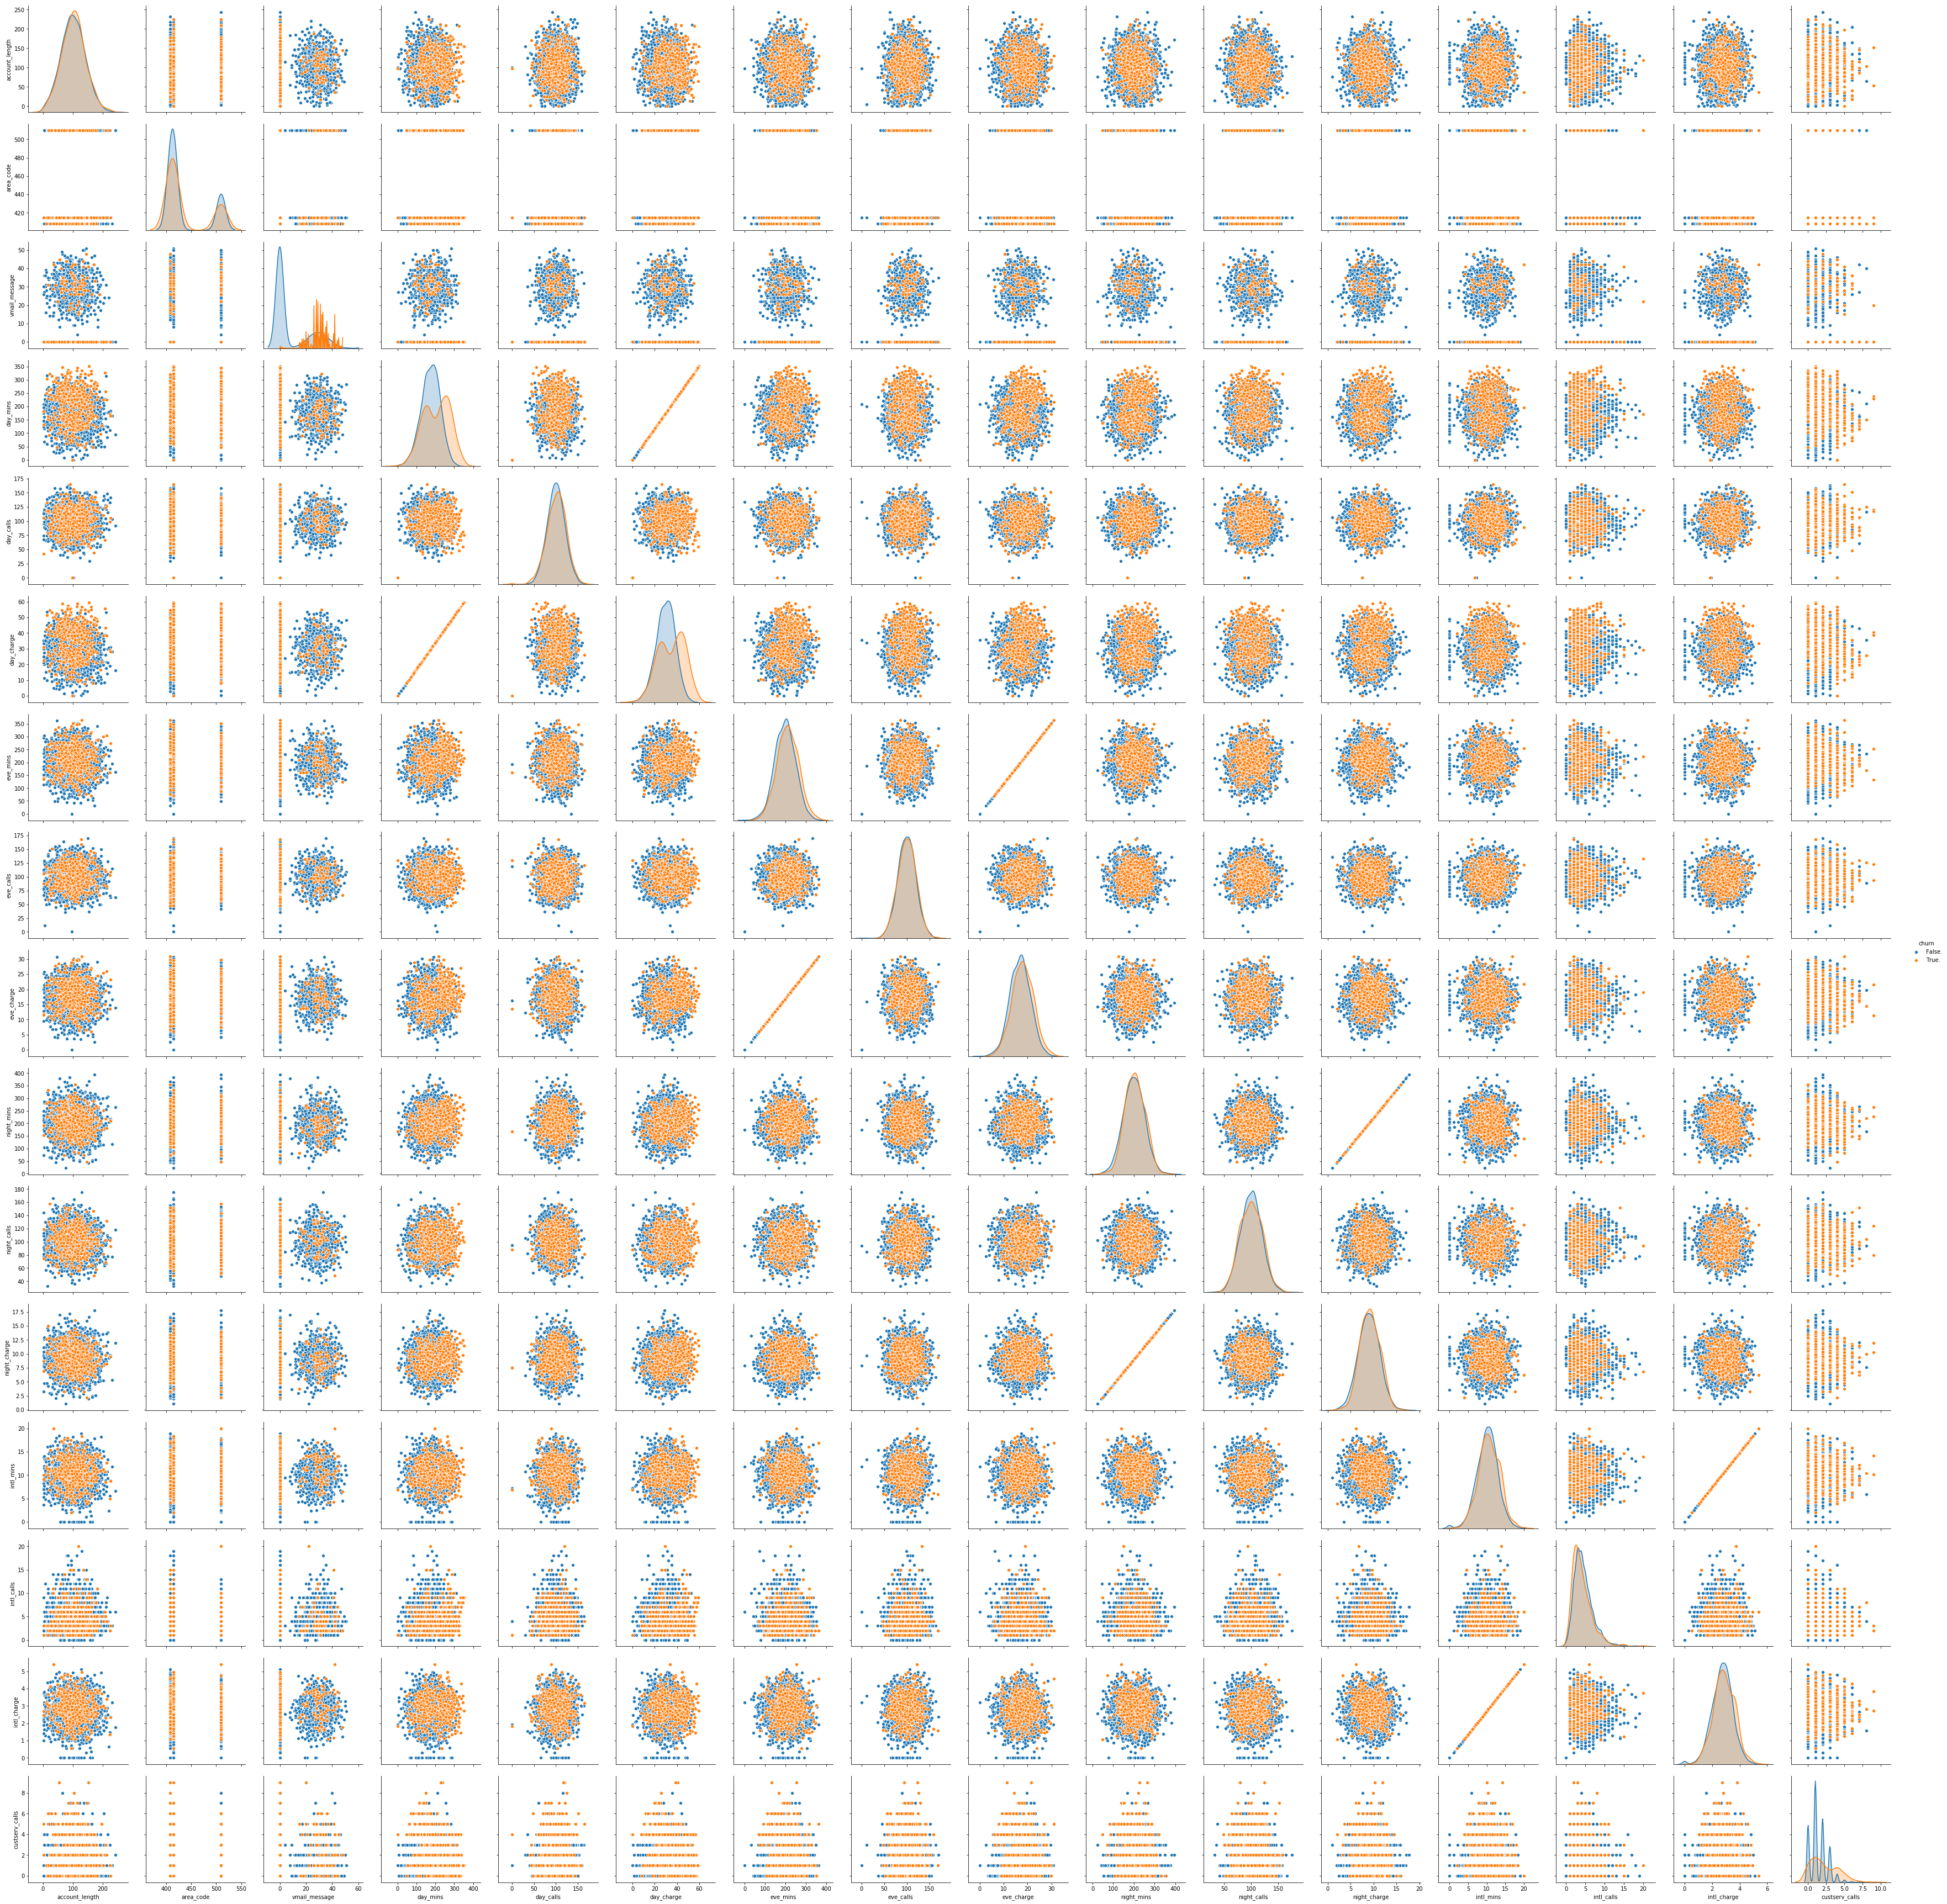

In [20]:
# -- 2uestion what does a pairs plot do? 
sns.pairplot(df, hue='churn', height=3)

# Part 2.
## 5. Partition into 75/25 split 


In [21]:
## Convert income to a 0 / 1 
df['churn'] = df['churn'].map({'False.': 0, 'True.': 1})
df['churn'].value_counts(normalize=True)

0    0.855086
1    0.144914
Name: churn, dtype: float64

In [22]:
train, test = train_test_split(df,test_size=0.30)
print("train pct: {:2.2%}".format(train.shape[0]/df.shape[0]))
print("test  pct: {:2.2%}".format(test.shape[0]/df.shape[0]))


train pct: 70.00%
test  pct: 30.00%


## 6. Train a decision tree model  


### About Decision Trees

> scikit-learn version of Decision Trees uses an optimised version of the CART algorithm. 

The following are the key "hyper-parameters" used to influence training and tuning of a decision tree. 

-----

   #### criterion{“gini”, “entropy”}, default=”gini”
    The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

   ####  splitter{“best”, “random”}, default=”best”
    The strategy used to choose the split at each node. Supported strategies are “best” to choose the best split and “random” to choose the best random split.

   #### max_depth, default=None
    The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

   #### min_samples_split, default=2
    The minimum number of samples required to split an internal node:


## The Hard way with Pandas.  
---
Nulls known as NAs in Python and Categorical varaibles are a problem for all machine learning models. Some methods will handle them for you others not so much. We are going to learn to use sklearn pipelines to deal with nulls and all the transformation logic needed for both numeric and categorical variables, but first i'm gong to show you the manual way do deal with this, which is essentially write code. This way works but is not neat and tidy like the sklearn pipeline approach I'll outline below. 

the manual approach follows these steps: 

1. Split your features into categorical and numeric, Why? becaouse you need to handle each separately.  

2. Use pandas' fillna function to replace nulls 
    - numerics we'll code missing as -1, but we could replace missing with the mean, median, mode or some other value. 
    - character columns we'll replace missing with "missing", but we could replace it with mode or some other value as well. 

3. Use panda's get_dummies to create 0/1s for all categories in your dataset. 

4. Partition into training and Test

5. Train Tree

6. Evaluate 


In [23]:
df.dtypes

state              object
account_length      int64
area_code           int64
phone              object
intl_plan          object
vmail_plan         object
vmail_message       int64
day_mins          float64
day_calls           int64
day_charge        float64
eve_mins          float64
eve_calls           int64
eve_charge        float64
night_mins        float64
night_calls         int64
night_charge      float64
intl_mins         float64
intl_calls          int64
intl_charge       float64
custserv_calls      int64
churn               int64
day_mins_bin       object
dtype: object

In [24]:
# 1. Split features into categorical and numeric 
target = 'churn'

numeric_features = [x for x in df.select_dtypes(include=['float64', 'int64']).columns if x not in target]

categorical_features = [x for x in df.select_dtypes(include=['object']).columns if x not in target]


In [25]:
df_prep = df.copy()
# 2. deal with nulls using fillna 
df_prep[numeric_features]     = df_prep[numeric_features].fillna(-1)
df_prep[categorical_features] = df_prep[categorical_features].astype('str').fillna('missing')
df_prep.isnull().sum(axis = 0)

state             0
account_length    0
area_code         0
phone             0
intl_plan         0
vmail_plan        0
vmail_message     0
day_mins          0
day_calls         0
day_charge        0
eve_mins          0
eve_calls         0
eve_charge        0
night_mins        0
night_calls       0
night_charge      0
intl_mins         0
intl_calls        0
intl_charge       0
custserv_calls    0
churn             0
day_mins_bin      0
dtype: int64

In [26]:
#3. use get_dummies to turn categorical features into 0/1s 
y = df[target].values
df_prep = pd.get_dummies(df[numeric_features+categorical_features],columns=categorical_features)
df_prep.columns

Index(['account_length', 'area_code', 'vmail_message', 'day_mins', 'day_calls',
       'day_charge', 'eve_mins', 'eve_calls', 'eve_charge', 'night_mins',
       ...
       'day_mins_bin_(-0.351, 35.08]', 'day_mins_bin_(105.24, 140.32]',
       'day_mins_bin_(140.32, 175.4]', 'day_mins_bin_(175.4, 210.48]',
       'day_mins_bin_(210.48, 245.56]', 'day_mins_bin_(245.56, 280.64]',
       'day_mins_bin_(280.64, 315.72]', 'day_mins_bin_(315.72, 350.8]',
       'day_mins_bin_(35.08, 70.16]', 'day_mins_bin_(70.16, 105.24]'],
      dtype='object', length=3414)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(df_prep,y, test_size=0.30)
print("train pct: {:2.2%}".format(train.shape[0]/df.shape[0]))
print("test  pct: {:2.2%}".format(test.shape[0]/df.shape[0]))

train pct: 70.00%
test  pct: 30.00%


In [28]:
dtree = tree.DecisionTreeClassifier(
                                    criterion='gini',
                                    max_depth=3,
                                    min_samples_leaf=2)
dtree = dtree.fit(X_train, y_train)
dtree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

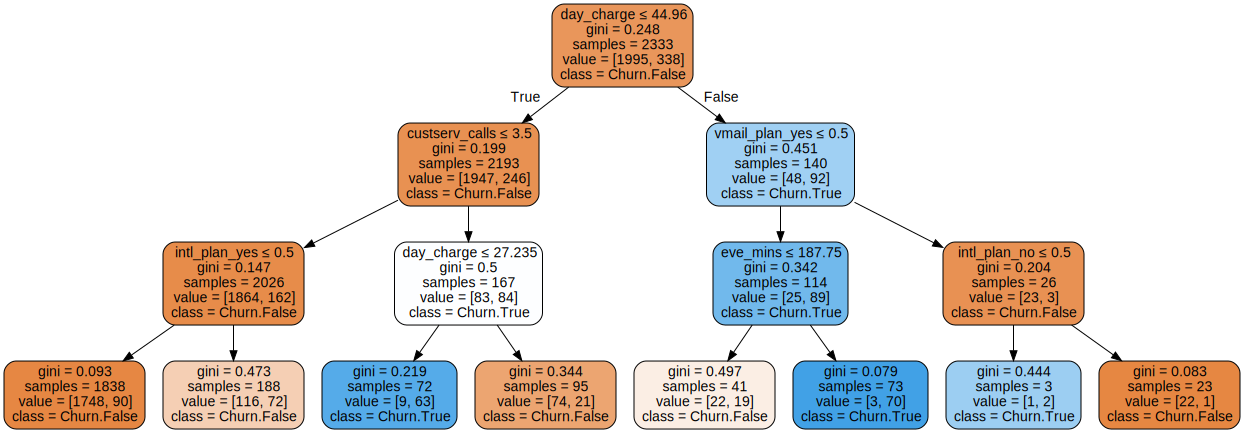

In [29]:
dot_data = tree.export_graphviz(dtree, out_file=None, 
                      feature_names=X_train.columns, 
                        class_names = ["Churn.False", "Churn.True"],
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

### Build a Pipeline 
-------
Why a pipeline? most ML models can't or won't explicitly handle string data we have to convert it to a number. 

What are my options. Well there are two options.
1. manually deal with missing values, pd.fillna will do the job 
    - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html 
2. mannually create 0/1s,  pd.get_dummies will do that too 
    - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html
    
The problem is that this works for academic datasets but doesn't work in the real-world. in the real-world data is messy what happens when you get a new level in one of your categorical variables, more hand coding. No manually dealing with missing values and categorical varaibles is a lot fo work for very little gain. The best pratice is to use a pipeline! 





In [30]:
# -- we need this to make our pipeline 
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.inspection import permutation_importance
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

## Create our Pipeline 



In [35]:
# -- this is your pipeline based model -- 
categorical_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='mean'))
])

preprocessing = ColumnTransformer(transformers=[
    ('cat', categorical_pipe, categorical_features),
    ('num', numerical_pipe, numeric_features)
    ])

decision_tree = Pipeline([
    ('preprocess', preprocessing),
    ('classifier', DecisionTreeClassifier(max_depth = 3,
                                          min_samples_leaf = 2, 
                                          criterion = 'gini',
                                          random_state=42))
])

decision_tree = decision_tree.fit(train[categorical_features + numeric_features], train[target])
decision_tree

Pipeline(memory=None,
         steps=[('preprocess',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('cat',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value='missing',
                                                                                 missing_values=nan,
                                                                                 strategy='constant',
                                                        

### Extract Transformed Feature Names, 

this just makes life easier... we need to get the new feature names from the transformed data specifically from the categorical transformer. Since we use onehot encoding we turn all categories into new columns with 0/1s. 

In [36]:
# -- gets the feature names 
categorical_pipe.fit_transform(train[categorical_features])
transformed_categorical = categorical_pipe['onehot'].get_feature_names(categorical_features).tolist()

# -- creates one list of all the feature names. 
feature_names =  transformed_categorical + numeric_features


### We can Visualize our Decision Tree using graphviz 

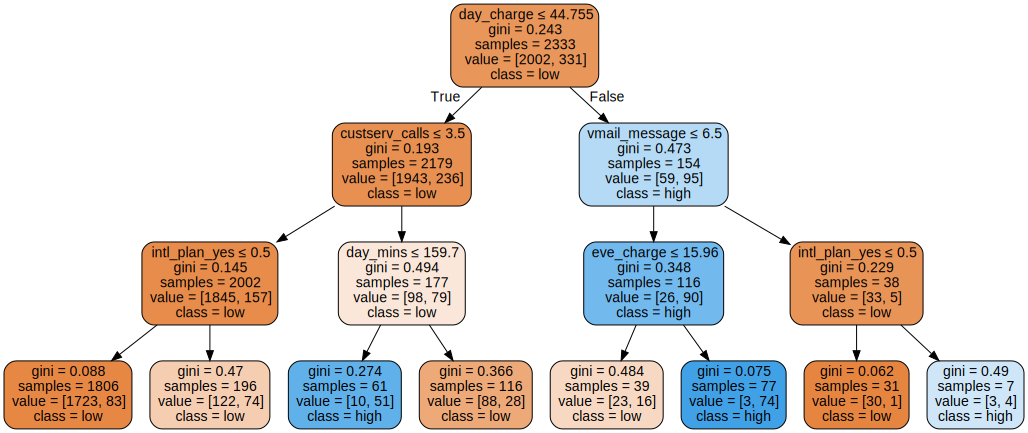

In [37]:
# -- chart of tree 
import graphviz 
dot_data = tree.export_graphviz(decision_tree['classifier'], 
                                out_file=None,
            feature_names = feature_names,
            class_names=["low", "high"],
            max_depth = 3,
            filled=True, 
            rounded=True,  
            special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

#### We can also get a list of rules from our tree, this is usful for interpreting what the model is doing

In [38]:
# -- Text based Rules for your Tree 
r = export_text(decision_tree['classifier'], 
                feature_names= feature_names)
print(r)

|--- day_charge <= 44.75
|   |--- custserv_calls <= 3.50
|   |   |--- intl_plan_yes <= 0.50
|   |   |   |--- class: 0
|   |   |--- intl_plan_yes >  0.50
|   |   |   |--- class: 0
|   |--- custserv_calls >  3.50
|   |   |--- day_mins <= 159.70
|   |   |   |--- class: 1
|   |   |--- day_mins >  159.70
|   |   |   |--- class: 0
|--- day_charge >  44.75
|   |--- vmail_message <= 6.50
|   |   |--- eve_charge <= 15.96
|   |   |   |--- class: 0
|   |   |--- eve_charge >  15.96
|   |   |   |--- class: 1
|   |--- vmail_message >  6.50
|   |   |--- intl_plan_yes <= 0.50
|   |   |   |--- class: 0
|   |   |--- intl_plan_yes >  0.50
|   |   |   |--- class: 1



## useful python trick... 

```python
for counter, value in enumerate(some_list):
    print(counter, value)
```

In [ ]:

# -- get feature importance 
importance = decision_tree['classifier'].feature_importances_

# -- summarize feature importance into a dictionary 
feature_imp ={}
for i,v in enumerate(importance):
    feature_imp[feature_names[i]] = v

# make the dictionary a data frame 
feature_imp = pd.DataFrame.from_dict(feature_imp, orient='index',
                                     columns=['importance'])

# -- prep and filter our dataframe, only need to look at the important features i.e. things > 0 
feature_imp = (feature_imp
               .reset_index()
               .rename(columns={'index':'feature'})
               .sort_values('importance',ascending=False)
               .query('importance > 0.01'))

# -- plot that 
plt.figure(figsize=(10,10))
sns.barplot(x="importance", y="feature", data=feature_imp, color="lightblue")
plt.title('Decision Tree Variable Iportance')
plt.ylabel('Feature')
plt.xlabel('Importance ')
plt.xticks(rotation=45)
plt.show()




##  Evaluate Performance 
-----

Here we want to compare the accuracy and confusion matrix of our decision tree pipeline on both our training data and test data. Sklearn provides two convient function to apply our models 

    .predict() - predicts the "label" or "target" on a new data set. This method accepts one argument, the new data set (e.g. model. predict(X_new) ), and returns the learned label for row. in our case it will return a 1 for income >50K and a 0 for <=50K
    
    .predict_proba() -  gives us the probabilities for the target (0 and 1) in array form. The number of probabilities for each row is equal to the number of categories in target variable. 
    
-----
1. Apply to training data 
2. Apply to testing data
3. Compare accuracy and confusion matrix 


In [ ]:
train['churn_pred'] = decision_tree.predict(train[numeric_features + categorical_features])
train_probabilites = decision_tree.predict_proba(train[numeric_features + categorical_features])
train['churn_p0'] = train_probabilites[:,0]
train['churn_p1'] = train_probabilites[:,1]
train.head()

In [ ]:
test['churn_pred'] = decision_tree.predict(test[numeric_features + categorical_features])
test_probabilites = decision_tree.predict_proba(test[numeric_features + categorical_features])
test['churn_p0'] = test_probabilites[:,0]
test['churn_p1'] = test_probabilites[:,1]
test.head()

In [ ]:
print("Training confusion Matrix")
confusion_matrix = pd.crosstab(train['churn'], train['churn_pred'],  rownames=['Actual'], colnames=['Predicted'])
confusion_matrix_pct = pd.crosstab(train['churn'], train['churn_pred'], normalize="index", rownames=['Actual'], colnames=['Predicted']).round(3)
print (confusion_matrix)

plt.figure(figsize=(8,5))
sns.heatmap(confusion_matrix, annot=True, fmt='g')
plt.show()

plt.figure(figsize=(8,5))
sns.heatmap(confusion_matrix_pct, annot=True, fmt='g')
plt.show()

In [ ]:
print("Test confusion Matrix")
confusion_matrix = pd.crosstab(test['churn'], test['churn_pred'],  rownames=['Actual'], colnames=['Predicted'])
confusion_matrix_pct = pd.crosstab(test['churn'], test['churn_pred'], normalize="index", rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)

plt.figure(figsize=(8,5))
sns.heatmap(confusion_matrix, annot=True, fmt='g')
plt.show()

plt.figure(figsize=(8,5))
sns.heatmap(confusion_matrix_pct, annot=True, fmt='g')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
### Default Accuracy, i.e. do nothing predict everyone as <50K, is the same as saying what % of <50K 
accuracy_default = train['churn'].value_counts(normalize='True')[0]
accuracy_train = accuracy_score(train['churn'], train['churn_pred'])
accuracy_test = accuracy_score(test['churn'], test['churn_pred'])
print("Default Accuracy : {:2.2%}".format(accuracy_default))
print("Train Accuracy   : {:2.2%}".format(accuracy_train))
print("Test Accuracy    : {:2.2%}".format(accuracy_test))

## 8. Thoughts


<div class="alert-success"> 💡  <strong> Comentary </strong>

Well our decison tree is a lot more accurate than our rule, if we looked at our rule from the previous project we had a accuracy of 53% on both training and test, which is much worse than just doing nothing (76% accurate). Here we are 87% accurate on the trainig set and 85.5% on the test set, significantly better at predicting income. 

Key things to note:  
1. tree depth plays a big role in a tree's abilty to predict 
2. based on the analysis below, by removing the marital_status(the first split feature) we get similar performance? whats going on? 
3. marital_status and relationship appear to have similar importance 

I wonder how we can take advantage of this feature of decision trees to improve their performance? 

</div>


In [ ]:
# -- remove marital_status and retrain 
# 1. Split features into categorical and numeric 
target = 'churn'
excludes = ['day_mins', 'day_calls', 'day_charge', 'phone', 'day_mins_bin']

numeric_features = [x for x in df.select_dtypes(include=['float64', 'int64']).columns if x not in [target] + excludes]

categorical_features = [x for x in df.select_dtypes(include=['object']).columns if x not in [target] + excludes]
#feature_names = numeric_features + categorical_features

categorical_features

In [ ]:
# -- this is your pipeline based model -- 
categorical_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False))
])

numerical_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='mean'))
])

preprocessing = ColumnTransformer(transformers=[
    ('cat', categorical_pipe, categorical_features),
    ('num', numerical_pipe, numeric_features)
    ])

decision_tree = Pipeline([
    ('preprocess', preprocessing),
    ('classifier', RandomForestRegressor(max_depth = 10,
                                          min_samples_leaf = 2, 
                                          criterion = 'gini',
                                          random_state=42))
])

decision_tree2 = decision_tree.fit(train[categorical_features + numeric_features], train[target])
decision_tree2

In [ ]:
train['churn_pred'] = decision_tree2.predict(train[numeric_features + categorical_features])
train_probabilites = decision_tree2.predict_proba(train[numeric_features + categorical_features])

train['churn_p0'] = train_probabilites[:,0]
train['churn_p1'] = train_probabilites[:,1]

test['churn_pred'] = decision_tree2.predict(test[numeric_features + categorical_features])
test_probabilites = decision_tree2.predict_proba(test[numeric_features + categorical_features])

test['churn_p0'] = test_probabilites[:,0]
test['churn_p1'] = test_probabilites[:,1]


accuracy_default = train['churn'].value_counts(normalize='True')[0]
accuracy_train = accuracy_score(train['churn'], train['churn_pred'])
accuracy_test = accuracy_score(test['churn'], test['churn_pred'])
print("Default Accuracy : {:2.2%}".format(accuracy_default))
print("Train Accuracy   : {:2.2%}".format(accuracy_train))
print("Test Accuracy    : {:2.2%}".format(accuracy_test))


In [ ]:
# -- gets the feature names 
categorical_pipe.fit_transform(train[categorical_features])

transformed_categorical = categorical_pipe['onehot'].get_feature_names(categorical_features).tolist()

# -- creates one list of all the feature names. 
feature_names =  transformed_categorical + numeric_features
transformed_categorical

In [ ]:
# -- get feature importance 
importance = decision_tree2['classifier'].feature_importances_

# -- summarize feature importance into a dictionary 
feature_imp ={}
for i,v in enumerate(importance):
    feature_imp[feature_names[i]] = v

# make the dictionary a data frame 
feature_imp = pd.DataFrame.from_dict(feature_imp, orient='index',
                                     columns=['importance'])

# -- prep and filter our dataframe, only need to look at the important features i.e. things > 0 
feature_imp = (feature_imp
               .reset_index()
               .rename(columns={'index':'feature'})
               .sort_values('importance',ascending=False)
               .query('importance > 0.01'))

# -- plot that 
plt.figure(figsize=(10,10))
sns.barplot(x="importance", y="feature", data=feature_imp, color="lightblue")
plt.title('Decision Tree Variable Iportance')
plt.ylabel('Feature')
plt.xlabel('Importance ')
plt.xticks(rotation=45)
plt.show()
